# **PROYECTO FINAL IA**

---


### LIBRERIAS UTILIZADAS

In [1]:
import numpy  as np
import scipy
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
from sklearn import decomposition
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score

from sklearn.neural_network import MLPClassifier
from sklearn import svm

from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

In [2]:
from sklearn.metrics import confusion_matrix
def plot_confusionMatrix(y_true,y_pred):
    cn = confusion_matrix(y_true=y_true,y_pred=y_pred)
    
    fig,ax = plt.subplots(figsize=(5,5))
    sb.heatmap(cn,annot=True,linewidths=1.5)
    plt.show()
    return cn

### CARGANDO EL DATASET
https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009

In [4]:
df = pd.read_csv('winequality-red.csv')
df.head() # Visualización del dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
df.isnull().sum() # VERIFICACIÓN :  No tiene nulls

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.isna().sum() # VERIFICACIÓN : No tiene NAN's

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df['quality'].value_counts()  # Conociendo cuantos elementos hay por etiqueta

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [ ]:
print("Numero de filas =",np.size(df,0)) # numero de filas
print("Numero de columnas =",np.size(df,1)) # numero de columnas

Numero de filas = 1599
Numero de columnas = 12


In [ ]:
print(df.columns) # Nombre de cada columna

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


### Visualizando el nivel de corelación de las carácteristicas con la etiqueta

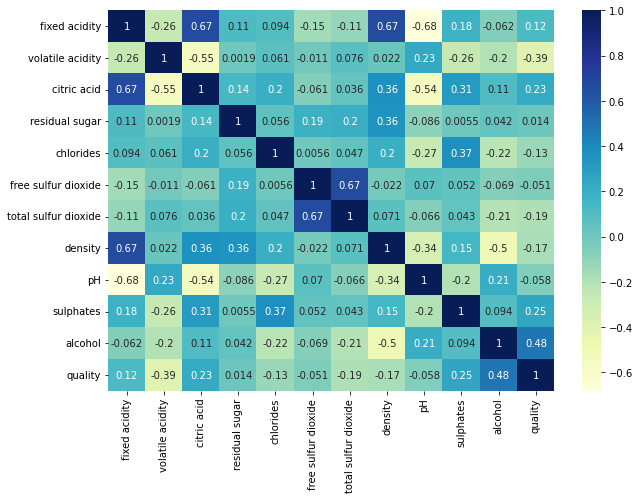

In [ ]:
plt.figure(figsize=(10,7)) # Tamaño del Gráfico
sb.heatmap(df.corr(), cmap="YlGnBu", annot=True) # Uso de Seaborn con la dunción de correlación para ver un mapa entendible y  lleno de información

De esta gráfica podemos visualizar que el alcohol, los sulfátos, el ácido cátrico y la acidez son las carácterísticas con mayor correlación respecto a la etiqueta " Calidad"

In [ ]:
#pd.plotting.scatter_matrix(df,figsize=(30,40), alpha=0.2)  # Este gráfico permite visualizar en min gráficos cada una de las caracteristicas o etiqueta y sus comportamientos

### Definiendo conjunto de características y el de etiquetas

In [5]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'	]].values
y = df['quality'].values

### Separando el conjunto de entrenamiento y el de prueba



In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)  #Se usó un conjunto de prueba del 15% garántizando uqe se cumplen los requisitos del proyecto y se fijó el random state en 0

### Normalizando los datos

Usando StandardScaler sobre el conjunto de entrenamiento y el de prueba

In [7]:
scaler = StandardScaler()
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Probando PCA y si es posible o no hacer reducción dimensional

In [ ]:
pca = decomposition.PCA(n_components=10,whiten=False,svd_solver='arpack')
pca.fit(X_train)
X_pca_train = pca.transform(X_train)
print(pca.explained_variance_ratio_)

pca.fit(X_test)
X_pca_test = pca.transform(X_test)
print(pca.explained_variance_ratio_)


[0.28206522 0.17820603 0.13862282 0.10911549 0.0867925  0.0601119
 0.05275018 0.03873677 0.03163397 0.01650953]
[0.30608959 0.168344   0.15074471 0.10768937 0.07956978 0.05977534
 0.05210004 0.03011128 0.0249554  0.01486491]


Dados estos resultados preliminares podriamos pensar en que reducir la dimensionalidad de nuestro dataset puede ser posible ya que los valores propios quese obtienen tienen una influencia del 99% sobre el comportamiento de las etiquetas.

Prueba de modelos para determinar el mejor para el dataset

### **Regresión logistica**

Iterando los hiperparámetros para obtener el mejor desempeño posible utilizando gridsearchcv

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l2"],"max_iter":[460000],"solver":["newton-cg","saga"],"random_state":[12]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'max_iter': 460000, 'penalty': 'l2', 'random_state': 12, 'solver': 'newton-cg'}
accuracy : 0.5923404601693076


Aplicando el mejor modelo obtenido y obteniendo indicadores de desempeño.





Accuracy: 62.50%
matthews_corrcoef 0.3738813693727063
F1 Score: 0.6061849482745004
0.58 accuracy with a standard deviation of 0.04


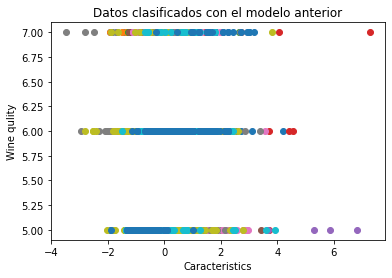

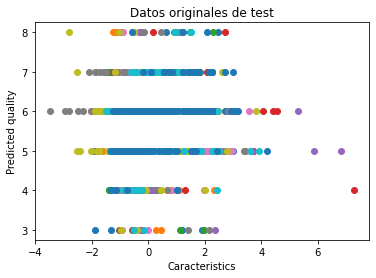

Confusion Matrix: 
 [[ 0  0  2  0  0  0]
 [ 0  0  4  2  1  0]
 [ 0  0 71 24  1  0]
 [ 0  0 27 73 10  0]
 [ 0  0  1 15  6  0]
 [ 0  0  0  1  2  0]]


In [ ]:
L2R = LogisticRegression(C= 100.0, max_iter= 460000, penalty= 'l2', solver= 'newton-cg',random_state=12)
L2R.fit(X_train,y_train)


y_pred = L2R.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(L2R, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()

print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Iterando los hiperparámetros para obtener el mejor desempeño posible utilizando gridsearchcv

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1"],"max_iter":[460000],"solver":["saga"],"random_state":[12]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'max_iter': 460000, 'penalty': 'l1', 'random_state': 12, 'solver': 'saga'}
accuracy : 0.5908671586715867


Aplicando el mejor modelo obtenido y obteniendo indicadores de desempeño.

Accuracy: 62.50%
matthews_corrcoef 0.3738813693727063
F1 Score: 0.6061849482745004
0.58 accuracy with a standard deviation of 0.02


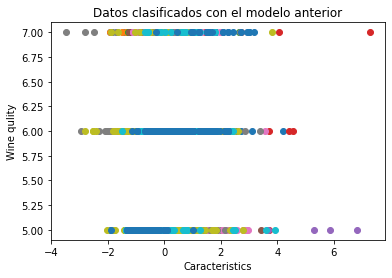

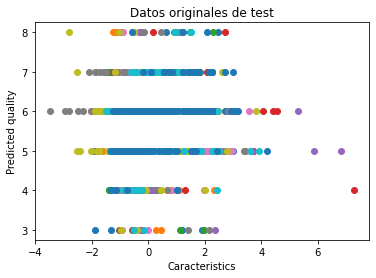

Confusion Matrix: 
 [[ 0  0  2  0  0  0]
 [ 0  0  4  2  1  0]
 [ 0  0 71 24  1  0]
 [ 0  0 27 73 10  0]
 [ 0  0  1 15  6  0]
 [ 0  0  0  1  2  0]]


In [ ]:
L1R = LogisticRegression(penalty='l1',max_iter=460000, C=100,random_state=12,solver='saga') # Regulación L1, C= 0,1 despues de probar con 1,0.1,0.01,0.01,100
L1R.fit(X_train,y_train)

y_pred = L1R.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(L1R, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()

print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Iterando los hiperparámetros usando metodo de regulación elasticnet

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["elasticnet"],"max_iter":[460000],"solver":["saga"],"random_state":[12],"l1_ratio":[0.5]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 100.0, 'l1_ratio': 0.5, 'max_iter': 460000, 'penalty': 'elasticnet', 'random_state': 12, 'solver': 'saga'}
accuracy : 0.5908671586715867


Implementando el mejor modelo encontrado por el gridsearchcv

Accuracy: 63.33%
matthews_corrcoef 0.3816841877333807
F1 Score: 0.6110245384020973
0.55 accuracy with a standard deviation of 0.03


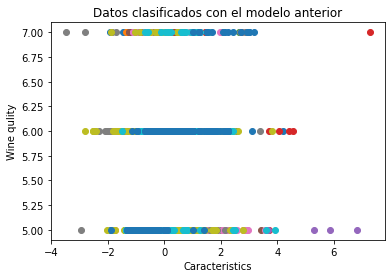

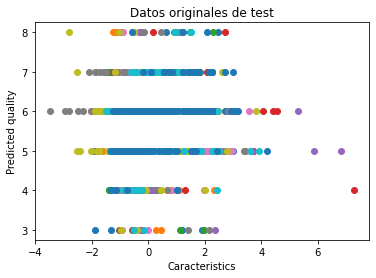

Confusion Matrix: 
 [[ 0  0  2  0  0  0]
 [ 0  0  4  2  1  0]
 [ 0  0 71 24  1  0]
 [ 0  0 30 75  5  0]
 [ 0  0  1 15  6  0]
 [ 0  0  0  1  2  0]]


In [ ]:
L12Rw = LogisticRegression(penalty='elasticnet',max_iter=460000, C=0.1,random_state=0,solver = 'saga',l1_ratio=0.5) #  Regulación Elasticnet,l1_ratio=0.5, C= 10 despues de probar con 1,0.1,0.01,0.01,100,10
L12Rw.fit(X_train,y_train)

y_pred = L12Rw.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(L12Rw, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()

print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Con PCA


Grid search de los mejores parámetros

In [ ]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1"],"max_iter":[460000],"solver":["saga"],"random_state":[12]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=5)
logreg_cv.fit(X_pca_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'max_iter': 460000, 'penalty': 'l1', 'random_state': 12, 'solver': 'saga'}
accuracy : 0.5930811808118082


Aplicando los mejores parámetros encontrados

Accuracy: 33.33%
matthews_corrcoef -0.11589113277003966
F1 Score: 0.3244771991119846
0.57 accuracy with a standard deviation of 0.02


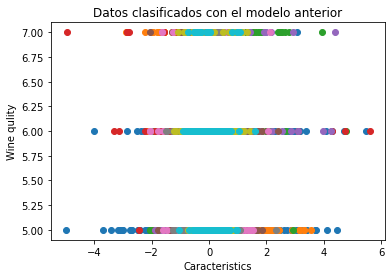

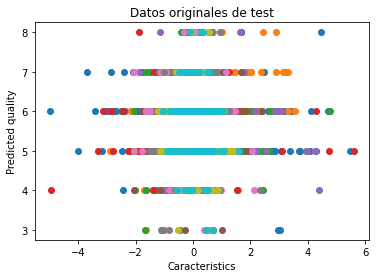

Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  0  3  3  1  0]
 [ 0  0 34 50 12  0]
 [ 0  0 59 46  5  0]
 [ 0  0 19  3  0  0]
 [ 0  0  3  0  0  0]]


In [ ]:
L1R = LogisticRegression(penalty='l1',max_iter=460000, C=1,random_state=12,solver='saga') # Regulación L1, C= 100 despues de probar con 1,0.1,0.01,0.01,100
L1R.fit(X_pca_train,y_train)

y_pred = L1R.predict(X_pca_test)

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(L1R, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_pca_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_pca_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()

print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Hecho a mano

Accuracy: 33.33%
matthews_corrcoef -0.11878770051553698
F1 Score: 0.3235521263493443
0.59 accuracy with a standard deviation of 0.04


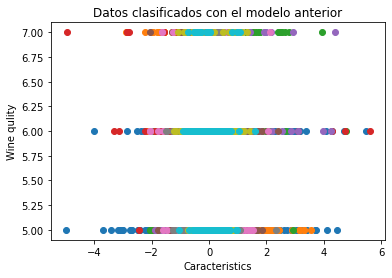

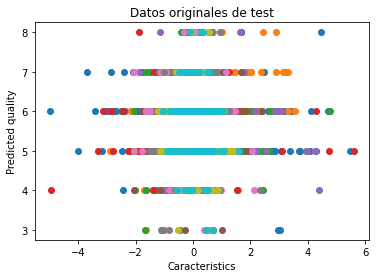

Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  0  3  3  1  0]
 [ 0  0 34 51 11  0]
 [ 0  0 59 46  5  0]
 [ 0  0 19  3  0  0]
 [ 0  0  3  0  0  0]]


In [ ]:
L2R = LogisticRegression(penalty='l2',max_iter=60000, C=1,random_state=0) #  Regulación L2, C= 1 despues de probar con 1,0.1,0.01,0.01,100,10
L2R.fit(X_pca_train,y_train)
y_pred = L2R.predict(X_pca_test)

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(L2R, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_pca_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_pca_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()

print('Confusion Matrix: \n', confusion_matrix(y_test,y_pred))

Conclusión Regresion logistca no es el mejor metodo con un indicador maximo del coeficiente de mathews de 0.39 y pca no nos sirve para estos datos.
En relación con la regularización, destacamos que con muy poca regularización aplicada el comportamiento del modelo mejora.

### Siguiente modelo SVM

Gridsearch del mejor modelo de SVM con kernels lineal y rbf

In [ ]:
rng = np.random.RandomState(0)
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10],"random_state":[0]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=5)
clf.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'kernel': 'rbf', 'random_state': 0}
accuracy : 0.6166133058389407


Implementación con los hiperparametros

Accuracy: 62.08%
matthews_corrcoef 0.3869060242428292
F1 Score: 0.6070007704813196
0.54 accuracy with a standard deviation of 0.02


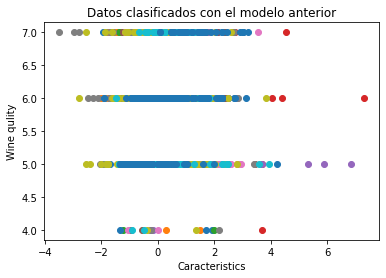

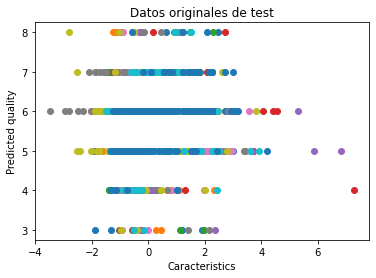

0.54 accuracy with a standard deviation of 0.02
Confusion Matrix: 
 [[ 0  1  0  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  1 74 20  1  0]
 [ 0  0 32 64 14  0]
 [ 0  0  1 10 11  0]
 [ 0  0  0  1  2  0]]


In [ ]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']
#lineal
Kernel=2
msv2 = svm.SVC(kernel=kernels[Kernel],gamma='scale',C=10,random_state=0)


msv2.fit(X_train, y_train)

y_pred = msv2.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(msv2, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

In [ ]:
rng = np.random.RandomState(0)
parameters = {'kernel':['poly'], 'C':[1, 10],"random_state":[0],'degree': np.arange(1,7,1)}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters,cv=5)
clf.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10, 'degree': 3, 'kernel': 'poly', 'random_state': 0}
accuracy : 0.6144291295854135


Accuracy: 59.58%
matthews_corrcoef 0.34225225538281717
F1 Score: 0.5892374727668845
0.51 accuracy with a standard deviation of 0.03


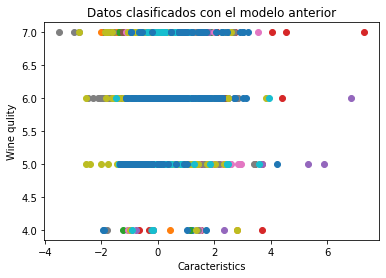

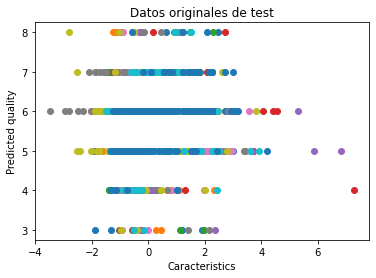

0.51 accuracy with a standard deviation of 0.03
Confusion Matrix: 
 [[ 0  1  1  0  0  0]
 [ 0  0  6  0  1  0]
 [ 0  2 63 28  3  0]
 [ 0  0 22 73 15  0]
 [ 0  0  1 14  7  0]
 [ 0  0  0  0  3  0]]


In [ ]:
kernels=['linear', 'poly', 'rbf', 'sigmoid']

Kernel=1
msv = svm.SVC(kernel=kernels[Kernel],degree=3,random_state = 0, C = 10)

#polinomial cúbico
msv.fit(X_train, y_train)

y_pred = msv.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(msv, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))


En este modelo, el coeficiente de mathews sigue siendo bastante bajo por lo que se procederá a probar con otros modelos

### Modelo a probar - ANN

In [ ]:
from sklearn import neural_network
parameters = {'learning_rate':['adaptive'],'solver': ['lbfgs','adam'], 'alpha': 10.0 ** -np.arange(1, 7), 'hidden_layer_sizes':[np.arange(5, 12),np.arange(5, 12),np.arange(5, 12)], 'random_state':[12],'activation':["relu"],"max_iter":[46000]}
clf_grid = GridSearchCV(neural_network.MLPClassifier(), parameters, n_jobs=-1)
clf_grid.fit(X_train,y_train)

print("-----------------Original Features--------------------")
print("Best score: %0.4f" % clf_grid.best_score_)
print("Using the following parameters:")
print(clf_grid.best_params_)


-----------------Original Features--------------------
Best score: 0.5982
Using the following parameters:
{'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': array([ 5,  6,  7,  8,  9, 10, 11]), 'learning_rate': 'adaptive', 'max_iter': 46000, 'random_state': 12, 'solver': 'lbfgs'}


Probando el mejor modelo encontrado

MLPClassifier(alpha=0.01, hidden_layer_sizes=(5, 6, 7, 8, 9, 10, 11),
              learning_rate='adaptive', max_iter=46000, random_state=12,
              tol=1e-07)
Accuracy: 61.67%
matthews_corrcoef 0.38463107075936526
F1 Score: 0.6023639774859286
0.56 accuracy with a standard deviation of 0.04


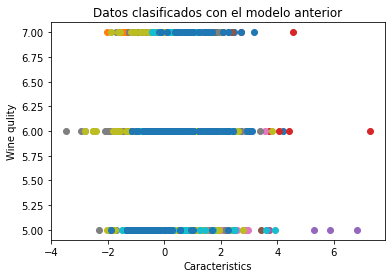

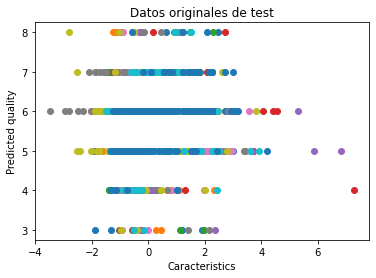

0.56 accuracy with a standard deviation of 0.04
Confusion Matrix: 
 [[ 0  0  2  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 75 19  2  0]
 [ 0  0 30 62 18  0]
 [ 0  0  1 10 11  0]
 [ 0  0  0  1  2  0]]


In [ ]:
clf = MLPClassifier(hidden_layer_sizes=(5,6,7,8,9,10,11),activation="relu",alpha=0.01,random_state=12,learning_rate='adaptive', max_iter=46000,solver="adam",tol=0.0000001)
#clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(clf.fit(X_train, y_train))

y_pred = clf.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(clf, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Modelo desarrollado a mano cambiando hiperparámetros

In [ ]:
clfw = MLPClassifier(hidden_layer_sizes=(100,100,50),alpha=0.01,activation="relu",random_state=1,learning_rate='adaptive', max_iter=6000000,solver="adam",tol=0.0000001)
#clf = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
print(clfw.fit(X_train, y_train))

Accuracy: 65.83%
matthews_corrcoef 0.4605903716705914
F1 Score: 0.6560168048602104
0.56 accuracy with a standard deviation of 0.03


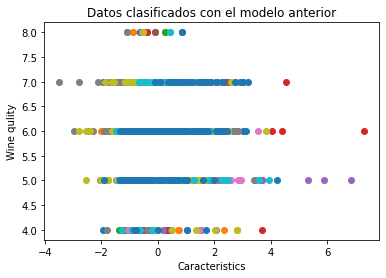

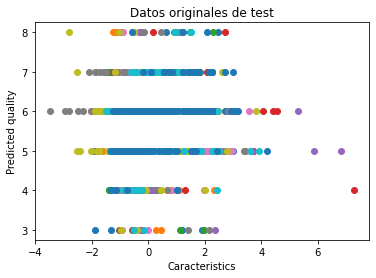

0.56 accuracy with a standard deviation of 0.03
Confusion Matrix: 
 [[ 0  0  2  0  0  0]
 [ 0  2  3  2  0  0]
 [ 0  4 68 23  1  0]
 [ 0  0 23 72 15  0]
 [ 0  0  1  3 16  2]
 [ 0  0  0  1  2  0]]


In [ ]:
y_pred = clfw.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(clfw, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))




### Probando modelo Random Forest

Aplicando grid search con score F1 macro

In [ ]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2000,3000,4000,1000,500,10,100],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,scoring='f1_macro')
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2000, 3000, 4000, 1000, 500, 10, 100],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]},
             scoring='f1_macro')

In [ ]:
print("tuned hpyerparameters :(best parameters) ",CV_rfc.best_params_)
print("accuracy :",CV_rfc.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2000, 'max_features': 'auto', 'n_estimators': 500}
accuracy : 0.3656812281938009


Accuracy: 70.83%
matthews_corrcoef 0.5184446143822726
F1 Score: 0.6925885885885886
0.58 accuracy with a standard deviation of 0.03


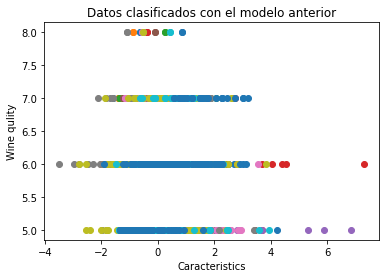

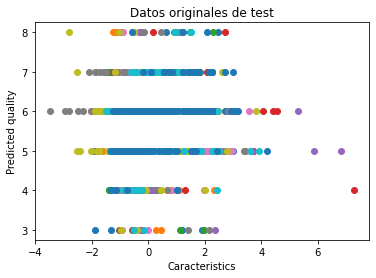

0.58 accuracy with a standard deviation of 0.03
Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 76 19  1  0]
 [ 0  0 21 82  7  0]
 [ 0  0  1  7 12  2]
 [ 0  0  0  1  2  0]]


In [ ]:
forest = RandomForestClassifier(max_depth=2000, random_state=42,criterion='entropy',n_estimators=500,max_features='auto')
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(forest, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Aplicando grid search con score default

In [ ]:
rfc=RandomForestClassifier(random_state=100)
param_grid = { 
    'n_estimators': [2000, 500,1000,5000],
    'max_features': ['auto'],
    'max_depth' : [2000],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'], 'max_depth': [2000],
                         'max_features': ['auto'],
                         'n_estimators': [2000, 500, 1000, 5000]})

In [ ]:
print("tuned hpyerparameters :(best parameters) ",CV_rfc.best_params_)
print("accuracy :",CV_rfc.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 2000, 'max_features': 'auto', 'n_estimators': 2000}
accuracy : 0.6718390492728457


Accuracy: 72.08%
matthews_corrcoef 0.537304158279301
F1 Score: 0.7037551140305307
0.57 accuracy with a standard deviation of 0.03


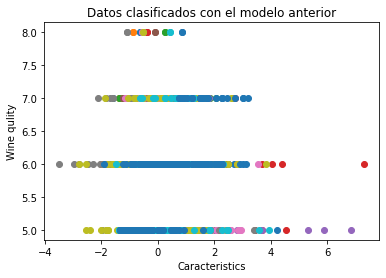

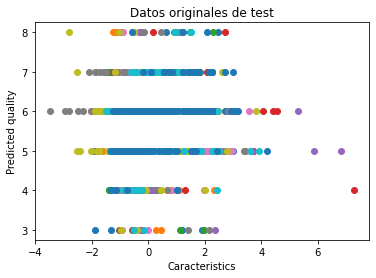

0.57 accuracy with a standard deviation of 0.03
Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 78 17  1  0]
 [ 0  0 20 84  6  0]
 [ 0  0  1  8 11  2]
 [ 0  0  0  1  2  0]]


In [ ]:
forestw = RandomForestClassifier(max_depth=2000, random_state=100,criterion='gini',n_estimators=2000,max_features='auto')
forestw.fit(X_train, y_train)

y_pred = forestw.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(forestw, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Implementando el mejor modelo encontrado

---
tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2000, 'max_features': 'auto', 'n_estimators': 500}
accuracy : 0.6681680052094638


In [ ]:
print("tuned hpyerparameters :(best parameters) ",CV_rfc.best_params_)
print("accuracy :",CV_rfc.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 2000, 'max_features': 'auto', 'n_estimators': 500}
accuracy : 0.6681680052094638


Accuracy: 70.83%
matthews_corrcoef 0.5184446143822726
F1 Score: 0.6925885885885886
0.58 accuracy with a standard deviation of 0.03


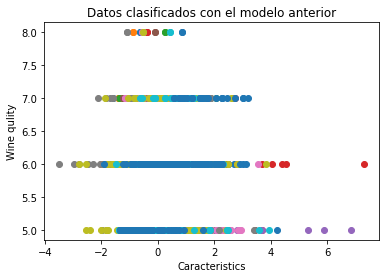

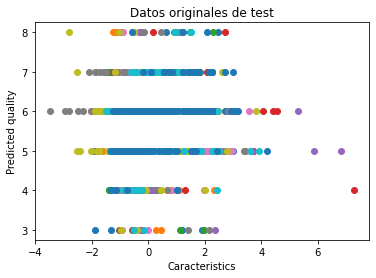

0.58 accuracy with a standard deviation of 0.03
Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  0  5  2  0  0]
 [ 0  0 76 19  1  0]
 [ 0  0 21 82  7  0]
 [ 0  0  1  7 12  2]
 [ 0  0  0  1  2  0]]


In [ ]:
forest = RandomForestClassifier(max_depth=2000, random_state=42,criterion='entropy',n_estimators=500,max_features='auto')
forest.fit(X_train, y_train)


y_pred = forest.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(forest, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Prueba sin cambiar hiperparametros

Accuracy: 70.83%
matthews_corrcoef 0.5190814045425453
F1 Score: 0.6930635201038788
0.57 accuracy with a standard deviation of 0.03


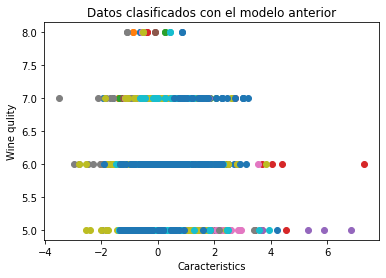

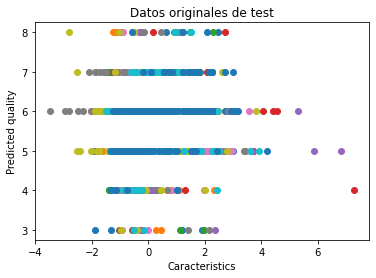

0.57 accuracy with a standard deviation of 0.03
Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  0  4  3  0  0]
 [ 0  0 75 20  1  0]
 [ 0  0 21 82  7  0]
 [ 0  0  1  6 13  2]
 [ 0  0  0  1  2  0]]


In [ ]:
forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)



y_pred = forest.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(forest, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

Accuracy: 71.25%
matthews_corrcoef 0.5263794398875759
F1 Score: 0.6959005354667376
0.58 accuracy with a standard deviation of 0.04


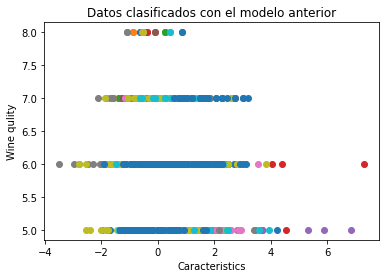

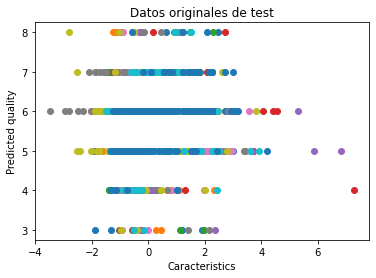

In [ ]:
forest = RandomForestClassifier(max_depth=2000, random_state=100,criterion='entropy',n_estimators=200)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(forest, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
y_test_pred=forest.predict(X_test)
plt.figure()
plt.plot(X_test,y_test_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()

### Arbol de decisiones

{'max_depth': 963}
0.40344952877423645
Accuracy: 60.42%
matthews_corrcoef 0.37621951009604476
F1 Score: 0.6070331594825381
0.47 accuracy with a standard deviation of 0.02


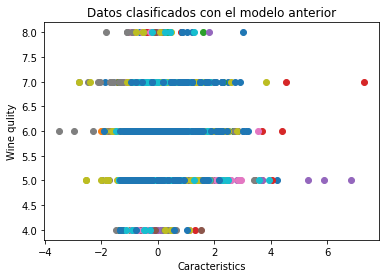

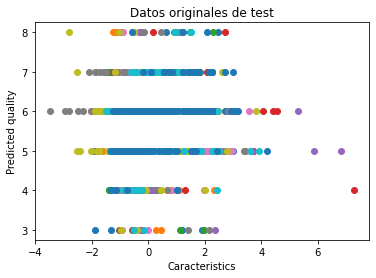

0.47 accuracy with a standard deviation of 0.02
Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  2  3  0  2  0]
 [ 0  1 70 23  2  0]
 [ 0  1 27 64 16  2]
 [ 0  1  3  6  9  3]
 [ 0  0  0  1  2  0]]


In [21]:
tree = DecisionTreeClassifier()

tree_params = {'max_depth': np.arange(3, 2100,10)} # dictionary of hyperparameters (name_of_hp: set_of_possible_values)

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='f1_macro') # 5-fold cross-validation
tree_grid.fit(X_train, y_train)

# The best values of parameters
print(tree_grid.best_params_)

# The best score
print(tree_grid.best_score_)

best_treew = tree_grid.best_estimator_
y_pred = best_treew.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(best_treew, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

{'max_depth': 16, 'min_samples_leaf': 3}
0.3629140188570891
Accuracy: 57.08%
matthews_corrcoef 0.32832681136597475
F1 Score: 0.5681000577034373
0.48 accuracy with a standard deviation of 0.02


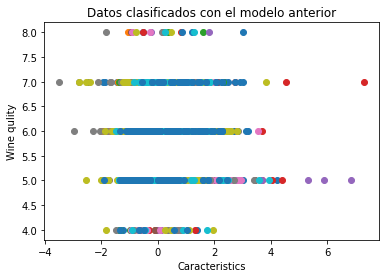

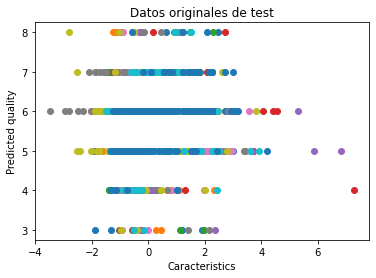

0.48 accuracy with a standard deviation of 0.02
Confusion Matrix: 
 [[ 0  0  2  0  0  0]
 [ 0  1  4  1  1  0]
 [ 0  0 67 26  3  0]
 [ 0  3 32 57 17  1]
 [ 0  1  3  5 12  1]
 [ 0  0  0  0  3  0]]


In [22]:
tree = DecisionTreeClassifier()

tree_params = {'max_depth': np.arange(3, 21), 'min_samples_leaf': np.arange(3, 8)} # dictionary of hyperparameters (name_of_hp: set_of_possible_values)

tree_grid = GridSearchCV(tree, tree_params, cv=5, scoring='f1_macro') # 5-fold cross-validation
tree_grid.fit(X_train, y_train)

# The best values of parameters
print(tree_grid.best_params_)

# The best score
print(tree_grid.best_score_)

best_tree = tree_grid.best_estimator_
y_pred = best_tree.predict(X_test)

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(best_tree, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

### Modelo KNN

In [8]:
knn = KNeighborsClassifier()

knn_params = {'n_neighbors': np.arange(1, 70, 2),'weights':['uniform', 'distance'],'n_jobs':[-1]} # dictionary of hyperparameters (name_of_hp: set_of_possible_values)

knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1_macro') # 5-fold cross-validation
knn_grid.fit(X_train, y_train)
print("tuned hpyerparameters :(best parameters) ",knn_grid.best_params_)
print("F1 macro :",knn_grid.best_score_)

tuned hpyerparameters :(best parameters)  {'n_jobs': -1, 'n_neighbors': 15, 'weights': 'distance'}
F1 macro : 0.36036841819520193


In [ ]:
# cross-validation results
#pd.DataFrame(knn_grid.cv_results_).T

0.6541666666666667
Accuracy: 65.42%
matthews_corrcoef 0.43902098849794036
F1 Score: 0.6409380318165001
0.49 accuracy with a standard deviation of 0.03


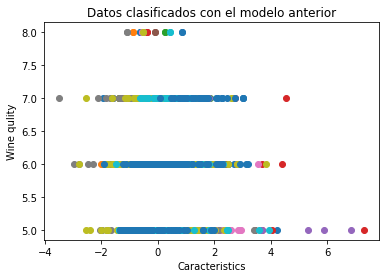

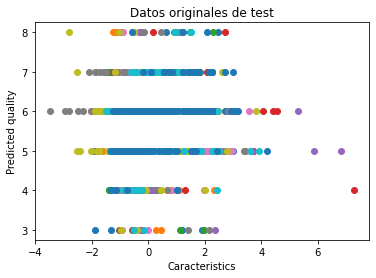

0.49 accuracy with a standard deviation of 0.03
Confusion Matrix: 
 [[ 0  0  1  1  0  0]
 [ 0  0  6  1  0  0]
 [ 0  0 73 22  1  0]
 [ 0  0 27 71 12  0]
 [ 0  0  1  6 13  2]
 [ 0  0  0  1  2  0]]


In [ ]:
knn_best = knn_grid.best_estimator_
y_pred = knn_best.predict(X_test)
print(accuracy_score(y_test, y_pred))

acc = accuracy_score(y_pred, y_test)
print('Accuracy: %.2f%%'%(acc*100))

MCC = matthews_corrcoef(y_test, y_pred)
print("matthews_corrcoef", MCC)

f1=f1_score(y_test, y_pred, average='weighted')
print("F1 Score:",f1)

scores = cross_val_score(knn_best, X, y, cv=5)
scores
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

plt.figure()
plt.plot(X_test,y_pred,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Wine qulity')
plt.title('Datos clasificados con el modelo anterior')
plt.show()


plt.figure()
plt.plot(X_test,y_test,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted quality')
plt.title('Datos originales de test')
plt.show()
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))
print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))

## Comparación de los mejores de los modelos entrenados

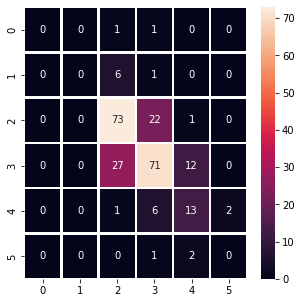

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  0,  6,  1,  0,  0],
       [ 0,  0, 73, 22,  1,  0],
       [ 0,  0, 27, 71, 12,  0],
       [ 0,  0,  1,  6, 13,  2],
       [ 0,  0,  0,  1,  2,  0]])

In [18]:
# KNN BEST
knn_best = knn_grid.best_estimator_
knn_best.fit(X_train, y_train)
y_pred_knn_best = knn_best.predict(X_test)
plot_confusionMatrix(y_test,y_pred_knn_best) 


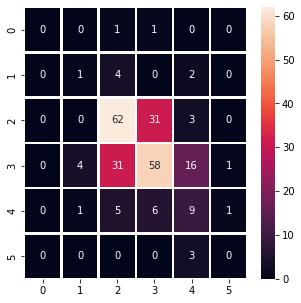

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  1,  4,  0,  2,  0],
       [ 0,  0, 62, 31,  3,  0],
       [ 0,  4, 31, 58, 16,  1],
       [ 0,  1,  5,  6,  9,  1],
       [ 0,  0,  0,  0,  3,  0]])

In [23]:
# DESICION TREE BEST

best_treew = tree_grid.best_estimator_
best_treew.fit(X_train, y_train)
y_pred_best_treew = best_treew.predict(X_test)
plot_confusionMatrix(y_test,y_pred_best_treew) 


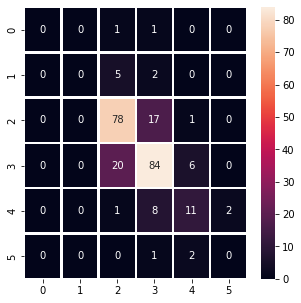

array([[ 0,  0,  1,  1,  0,  0],
       [ 0,  0,  5,  2,  0,  0],
       [ 0,  0, 78, 17,  1,  0],
       [ 0,  0, 20, 84,  6,  0],
       [ 0,  0,  1,  8, 11,  2],
       [ 0,  0,  0,  1,  2,  0]])

In [14]:
# RANDOM FOREST BEST
forestw = RandomForestClassifier(max_depth=2000, random_state=100,criterion='gini',n_estimators=2000,max_features='auto')
forestw.fit(X_train, y_train)
y_pred_forestw = forestw.predict(X_test)
plot_confusionMatrix(y_test,y_pred_forestw) 



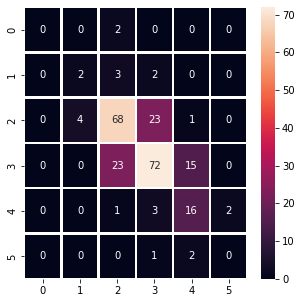

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  2,  3,  2,  0,  0],
       [ 0,  4, 68, 23,  1,  0],
       [ 0,  0, 23, 72, 15,  0],
       [ 0,  0,  1,  3, 16,  2],
       [ 0,  0,  0,  1,  2,  0]])

In [13]:
# ANN BEST
clfw = MLPClassifier(hidden_layer_sizes=(100,100,50),alpha=0.01,activation="relu",random_state=1,learning_rate='adaptive', max_iter=6000000,solver="adam",tol=0.0000001)
clfw.fit(X_train, y_train)
y_pred_clfw = clfw.predict(X_test)
plot_confusionMatrix(y_test,y_pred_clfw ) 



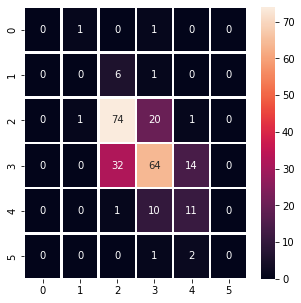

array([[ 0,  1,  0,  1,  0,  0],
       [ 0,  0,  6,  1,  0,  0],
       [ 0,  1, 74, 20,  1,  0],
       [ 0,  0, 32, 64, 14,  0],
       [ 0,  0,  1, 10, 11,  0],
       [ 0,  0,  0,  1,  2,  0]])

In [12]:
# SVM BEST
kernels=['linear', 'poly', 'rbf', 'sigmoid']
Kernel=2
msv2 = svm.SVC(kernel=kernels[Kernel],gamma='scale',C=10,random_state=0)
msv2.fit(X_train, y_train)
y_pred_msv2 = msv2.predict(X_test)
plot_confusionMatrix(y_test,y_pred_msv2) 

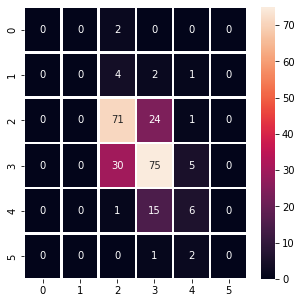

array([[ 0,  0,  2,  0,  0,  0],
       [ 0,  0,  4,  2,  1,  0],
       [ 0,  0, 71, 24,  1,  0],
       [ 0,  0, 30, 75,  5,  0],
       [ 0,  0,  1, 15,  6,  0],
       [ 0,  0,  0,  1,  2,  0]])

In [11]:


# LOGISTIC REGRESSION BEST
L12Rw = LogisticRegression(penalty='elasticnet',max_iter=460000, C=0.1,random_state=0,solver = 'saga',l1_ratio=0.5) #  Regulación Elasticnet,l1_ratio=0.5, C= 10 despues de probar con 1,0.1,0.01,0.01,100,10
L12Rw.fit(X_train,y_train)
y_pred_L12Rw = L12Rw.predict(X_test)
plot_confusionMatrix(y_test,y_pred_L12Rw)   


In [16]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [24]:
names = ['KNN','Decision Tree', 'Random Forest Classifier', 'Neural Network', 'SVM','LogisticRegression']
matthews = [matthews_corrcoef(y_test, y_pred_knn_best),matthews_corrcoef(y_test, y_pred_best_treew),matthews_corrcoef(y_test, y_pred_forestw),matthews_corrcoef(y_test, y_pred_clfw),matthews_corrcoef(y_test, y_pred_msv2),matthews_corrcoef(y_test, y_pred_L12Rw)]
f1 = [f1_score(y_test, y_pred_knn_best, average='weighted'),f1_score(y_test,  y_pred_best_treew, average='weighted'),f1_score(y_test, y_pred_forestw, average='weighted'),f1_score(y_test,y_pred_clfw, average='weighted'),f1_score(y_test, y_pred_msv2, average='weighted'),f1_score(y_test, y_pred_L12Rw, average='weighted')]
Crossval = [cross_val_score(knn_best, X, y, cv=5).mean(),cross_val_score(best_treew, X, y, cv=5).mean(),cross_val_score(forestw, X, y, cv=5).mean(),cross_val_score(clfw, X, y, cv=5).mean(),cross_val_score(msv2, X, y, cv=5).mean(),cross_val_score(L12Rw, X, y, cv=5).mean()]

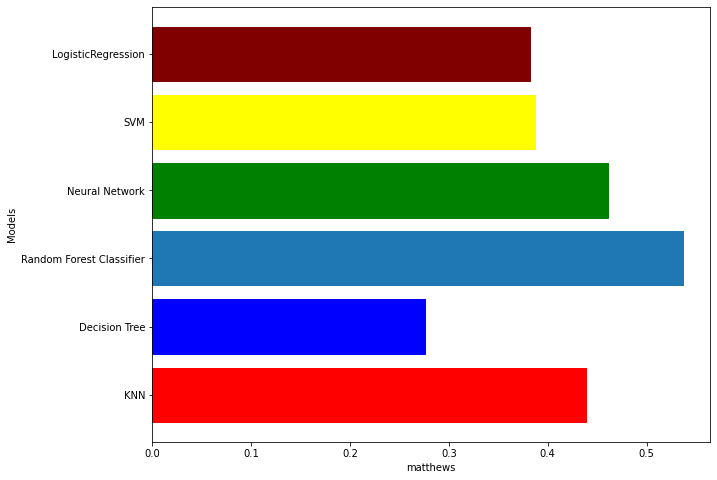

In [25]:
plt.figure(figsize=(10,8))
graph = plt.barh(names,matthews)
plt.xlabel('matthews')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')



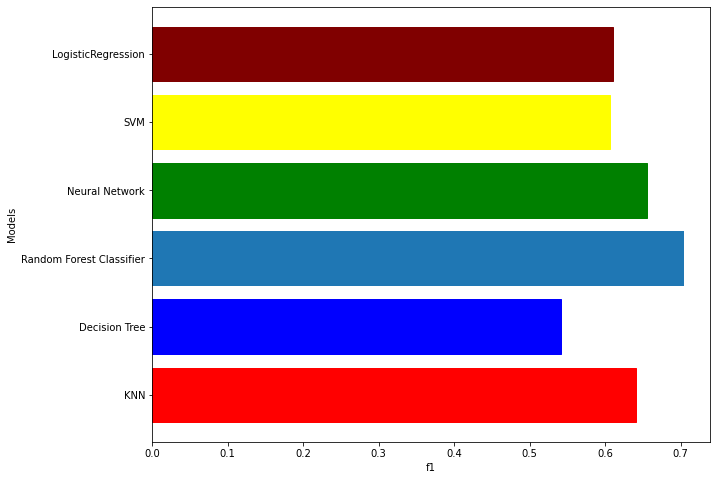

In [26]:
plt.figure(figsize=(10,8))
graph = plt.barh(names,f1)
plt.xlabel('f1')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')

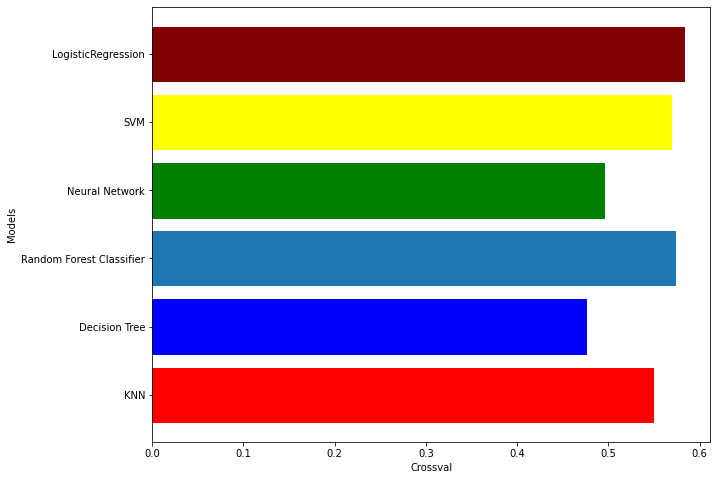

In [27]:
plt.figure(figsize=(10,8))
graph = plt.barh(names,Crossval)
plt.xlabel('Crossval')
plt.ylabel('Models')    
graph[0].set_color('red')
graph[1].set_color('blue')
graph[3].set_color('green')
graph[4].set_color('yellow')
graph[5].set_color('maroon')

### MODELO CON MEJOR DESEMPEÑO : RANDOM FOREST

PRUEBA CON TODO EL DATASET

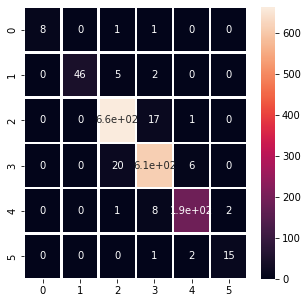

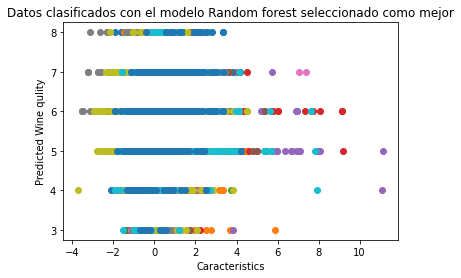

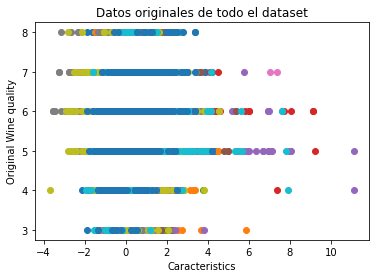

In [28]:
# RANDOM FOREST BEST
forestwdef = RandomForestClassifier(max_depth=2000, random_state=100,criterion='gini',n_estimators=2000,max_features='auto')
forestwdef.fit(X_train, y_train)
y_pred_forestwdef = forestwdef.predict(X)
plot_confusionMatrix(y,y_pred_forestwdef) 


plt.figure()
plt.plot(X,y_pred_forestwdef,'o',label='Complete data')
plt.xlabel('Caracteristics')
plt.ylabel('Predicted Wine qulity')
plt.title('Datos clasificados con el modelo Random forest seleccionado como mejor')
plt.show()
plt.figure()
plt.plot(X,y,'o')
plt.xlabel('Caracteristics')
plt.ylabel('Original Wine quality')
plt.title('Datos originales de todo el dataset')
plt.show()


In [31]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import time
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
# from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [32]:
model_params  = {
    "svm" : {
        "model":SVC(gamma="auto"),
        "params":{
            'C' : [1,10,20],
            'kernel':["rbf"]
        }
    },
    "decision_tree":{
        "model": DecisionTreeClassifier(),
        "params":{
            'criterion':["entropy","gini"],
            "max_depth":[5,8,9]
        }
    },
    "random_forest":{
        "model": RandomForestClassifier(),
        "params":{
            "n_estimators":[1,5,10],
            "max_depth":[5,8,9]
        }
    },
    "naive_bayes":{
        "model": GaussianNB(),
        "params":{}
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear',multi_class = 'auto'),
        'params': {
            "C" : [1,5,10]
        }
    }   
}

In [36]:
score=[]
for model_name,mp in model_params.items():
    clf = GridSearchCV(mp["model"],mp["params"],cv=8,return_train_score=False)
    clf.fit(X_train,y_train)
    score.append({
        "Model" : model_name,
        "Best_Score": clf.best_score_,
        "Best_Params": clf.best_params_
    })

In [37]:
df4 = pd.DataFrame(score,columns=["Model","Best_Score","Best_Params"])
df4

,Model,Best_Score,Best_Params
0,svm,0.619583,"{'C': 20, 'kernel': 'rbf'}"
1,decision_tree,0.599017,"{'criterion': 'gini', 'max_depth': 9}"
2,random_forest,0.656400,"{'max_depth': 9, 'n_estimators': 10}"
3,naive_bayes,0.536417,{}
4,logistic_regression,0.582792,{'C': 1}
